['JudyMurray', 'chrishoy', 'LaverCup', 'bgtennisnation', 'jamie_murray', 'Liambroady', 'wojespn', 'EntryLists', 'joshlukenichols', 'SkySportsPL', 'DanAbrahams77', 'tamimatheny', 'DrBhrettMcCabe', 'ITVRugby', 'SpirosValouxis', 'ShamsCharania', 'SportPsychTips', 'NoContextHumans', 'Vestige_du_jour', 'SamC_reports', 'iamtomskinner', 'BadLipReading', 'hubermanlab', 'BaskMonster', 'lemontwittor', 'refikanadol', 'BurryDeleted', 'michaeljburry', 'WifeyAlpha', 'TMRWSports', 'elonmusk', 'redrock_bball', 'Serranosisters', 'KatieTaylor', 'Iberia', 'BBCRosAtkins', 'FullFact', 'FerVerdasco', 'PhilMickelson', 'nealskupski', 'Chunkz', 'Dunks_Scott', 'TeamGB', 'robert1lefty', 'LPGA', 'DoubleDownNews', 'Thejessicakorda', 'NellyKorda', 'JoshBerryComedy', 'wenewlabs', 'Jonny_OMara', 'billygilmourrr', 'andrewrobertso5', 'iga_swiatek', 'PaulJubb3', 'itscarolineweir', 'primevideosport', 'mcboada', 'YLMSportScience', 'GordonRamsay', 'TommyHaas13', 'DalaiLama', 'DanBesbris', 'aaronbruski', 'SkySportsTennis', 

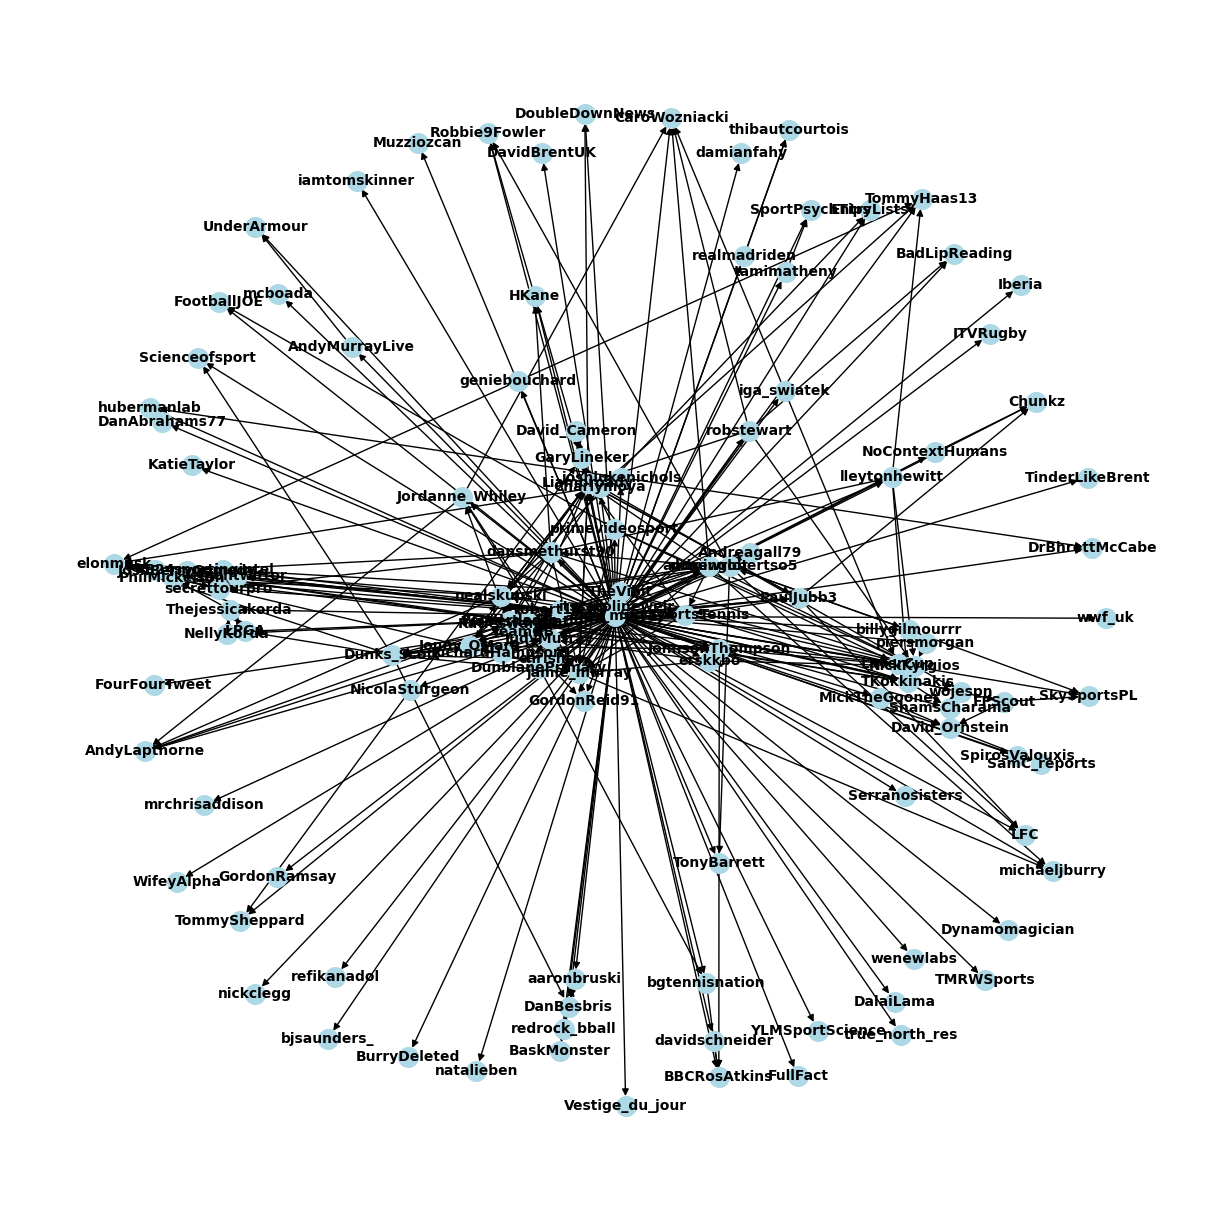

In [ ]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

# Initializing API credentials
headers = {
    "X-RapidAPI-Key": "c96095ab6fmsh8aef27ede081c79p16bc1djsn06537ad6130c",
    "X-RapidAPI-Host": "twitter-api45.p.rapidapi.com"
}


def fetch_following(screen_name, target_count=120):
    url = "https://twitter-api45.p.rapidapi.com/following.php"
    all_following = []
    querystring = {"screenname": screen_name}
    next_cursor = None

    while len(all_following) < target_count:
        if next_cursor is not None:
            querystring['cursor'] = next_cursor
        response = requests.get(url, headers=headers, params=querystring)

        if response.status_code == 200:
            data = response.json()
            all_following.extend([user['screen_name'] for user in data.get('following', []) if 'screen_name' in user])


            next_cursor = data.get('next_cursor')
            if not next_cursor:
                break
        else:
            print(f"Failed to fetch data for {screen_name}: {response.status_code}")
            break

    return all_following[:target_count]


G = nx.DiGraph()

#Fetch Murray's following and add them to the graph
murray_following = fetch_following("andy_murray")
G.add_node("andy_murray")
print(murray_following)

for user in murray_following:
    if user:  
        G.add_node(user)
        G.add_edge("andy_murray", user)

#For each of Murray's followings, fetch their followings and add edges if they follow each other
for user in murray_following:
    if user:  
        user_following = fetch_following(user)
        for followed_user in user_following:
            if followed_user and followed_user in murray_following:
                G.add_edge(user, followed_user)


nx.write_gexf(G, "andy_murray_network_graph.gexf")
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=200, node_color="lightblue", font_size=10, font_weight="bold")
plt.show()


Degree Distribution

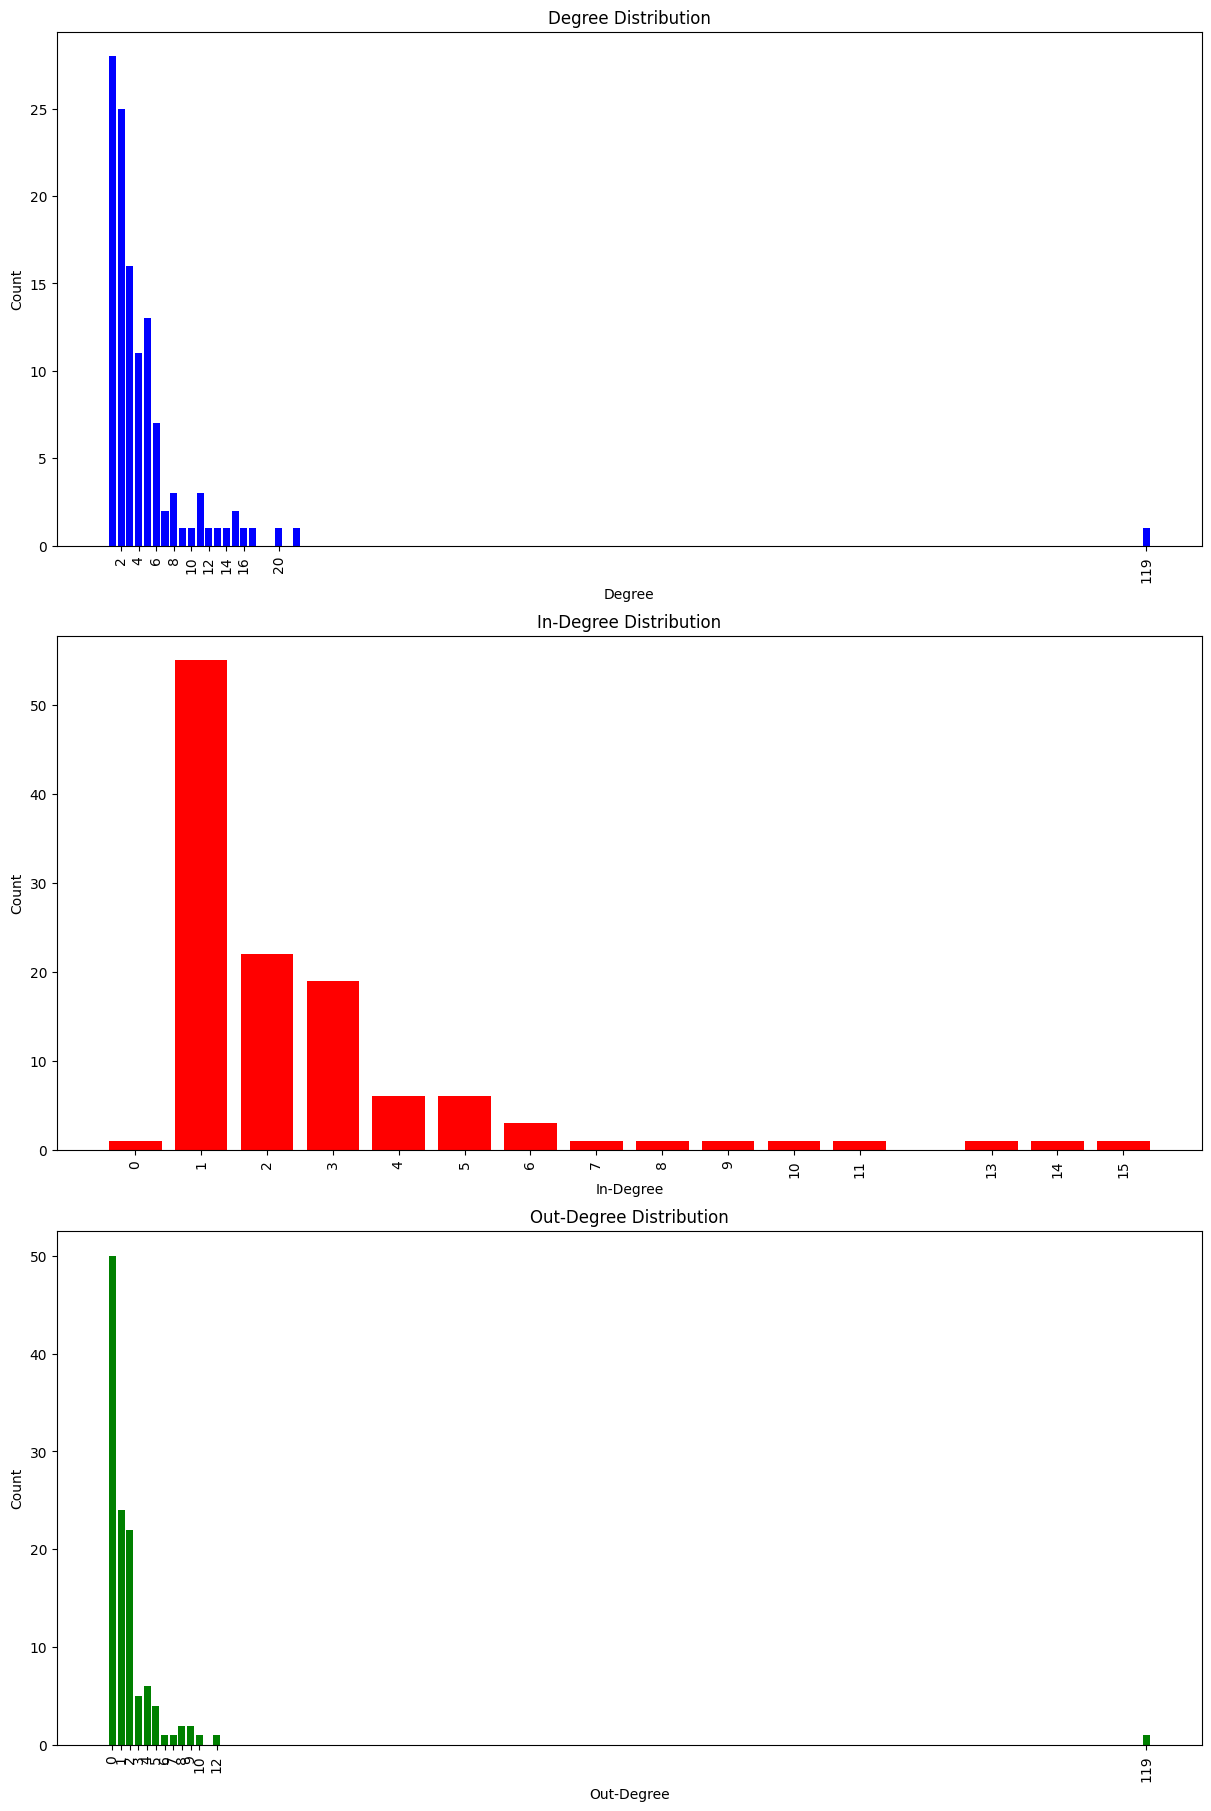

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import collections

G = nx.read_gexf('andy_murray_network_graph.gexf')

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

#In-Degree
in_degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)
in_degree_count = collections.Counter(in_degree_sequence)
in_deg, in_cnt = zip(*in_degree_count.items())

#Out-Degree
out_degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)
out_degree_count = collections.Counter(out_degree_sequence)
out_deg, out_cnt = zip(*out_degree_count.items())

#Plotting Degree, In-Degree, and Out-Degree Distributions
fig, axs = plt.subplots(3, 1, figsize=(12, 18), constrained_layout=True)

#Degree Distribution
axs[0].bar(deg, cnt, color='b')
axs[0].set_title("Degree Distribution")
axs[0].set_ylabel("Count")
axs[0].set_xlabel("Degree")
axs[0].set_xticks(deg[::len(deg)//10])

#In-Degree Distribution
axs[1].bar(in_deg, in_cnt, color='r')
axs[1].set_title("In-Degree Distribution")
axs[1].set_ylabel("Count")
axs[1].set_xlabel("In-Degree")
axs[1].set_xticks(in_deg[::len(in_deg)//10])

#Out-Degree Distribution
axs[2].bar(out_deg, out_cnt, color='g')
axs[2].set_title("Out-Degree Distribution")
axs[2].set_ylabel("Count")
axs[2].set_xlabel("Out-Degree")
axs[2].set_xticks(out_deg[::len(out_deg)//10])

for ax in axs:
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.show()


Average Clustering Coefficient: 0.2731281004717791


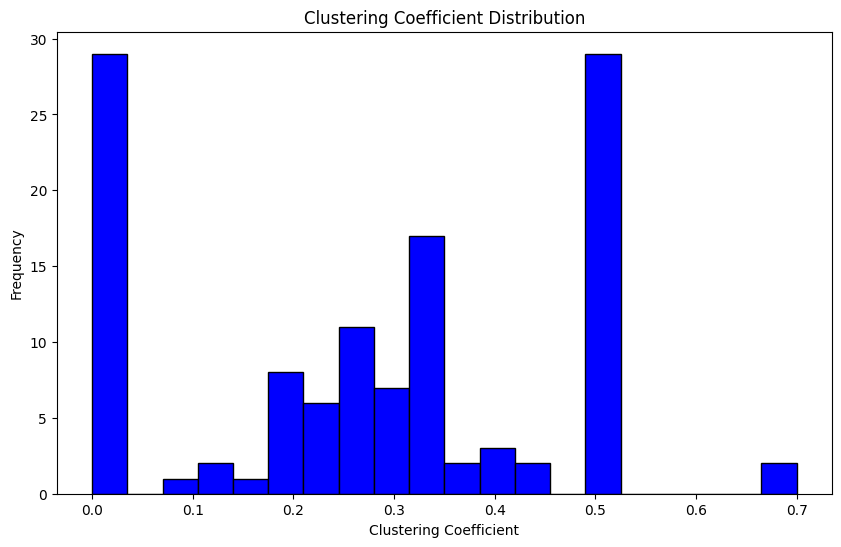

In [ ]:
clustering_coeffs = nx.clustering(G)

average_clustering_coefficient = nx.average_clustering(G)

print(f"Average Clustering Coefficient: {average_clustering_coefficient}")

clustering_values = list(clustering_coeffs.values())
plt.figure(figsize=(10, 6))
plt.hist(clustering_values, bins=20, color='b', edgecolor='black')
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

Eigenvector Centrality:
Node andy_murray: 2.307328007509493e-13
Node JudyMurray: 0.3498025452594994
Node chrishoy: 0.25420503757542645
Node LaverCup: 0.03391281174015506
Node bgtennisnation: 0.07801596083673408
Node jamie_murray: 0.4276093310740686
Node Liambroady: 0.33903241590670047
Node wojespn: 0.010006630767551847
Node EntryLists: 0.07801596083673408
Node joshlukenichols: 3.922457612766139e-12
Node SkySportsPL: 0.006130665031260631
Node DanAbrahams77: 3.922457612766139e-12
Node tamimatheny: 3.922457612766139e-12
Node DrBhrettMcCabe: 3.530211851489525e-11
Node ITVRugby: 3.922457612766139e-12
Node SpirosValouxis: 3.922457612766139e-12
Node ShamsCharania: 0.00598710005841857
Node SportPsychTips: 3.530211851489525e-11
Node NoContextHumans: 3.922457612766139e-12
Node Vestige_du_jour: 3.922457612766139e-12
Node SamC_reports: 0.00030509588991721025
Node iamtomskinner: 3.922457612766139e-12
Node BadLipReading: 3.530211851489525e-11
Node hubermanlab: 6.668177941702437e-11
Node BaskMonster:

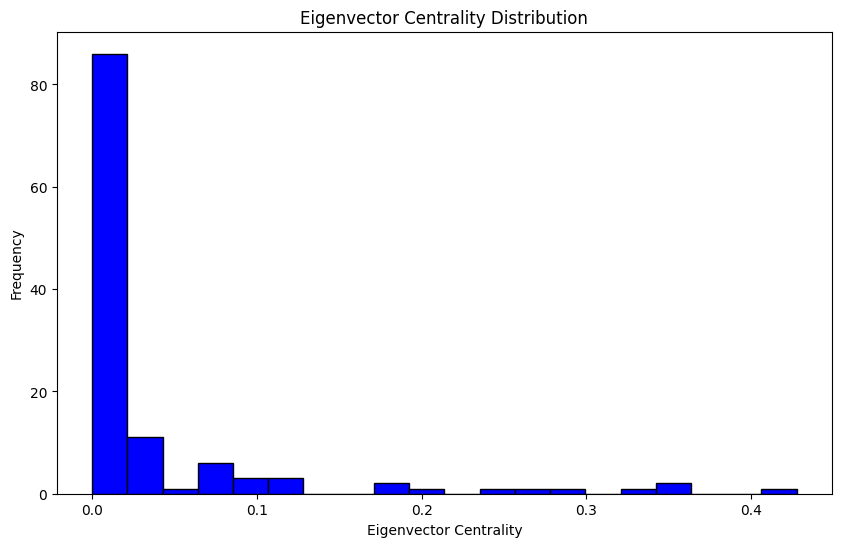

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=100)

#Eigenvector centrality for each node
print("Eigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")

#distribution of eigenvector centralities
plt.figure(figsize=(10, 6))
plt.hist(list(eigenvector_centrality.values()), bins=20, color='b', edgecolor='black')
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.show()

PageRank:
Node NickKyrgios: 0.03599443376566887
Node jamie_murray: 0.03578564040814561
Node elonmusk: 0.03349478208474347
Node ShamsCharania: 0.03210064114597824
Node TeamGB: 0.02970482472793436
Node TKokkinakis: 0.02591694708963271
Node Liambroady: 0.025080224626848946
Node nealskupski: 0.02429704941264546
Node DanBesbris: 0.02370481508203608
Node PhilMickelson: 0.022911406319207697
Node chrishoy: 0.021927694788432518
Node wojespn: 0.021855264986274388
Node redrock_bball: 0.02140777436839336
Node JudyMurray: 0.021078489623771707
Node SamC_reports: 0.020100199291921802
Node andrewrobertso5: 0.017762089352625545
Node David_Ornstein: 0.01731825174727894
Node Thejessicakorda: 0.01693624955991673
Node Jonny_OMara: 0.01692255636225872
Node LaverCup: 0.016637735299118855
Node BBCRosAtkins: 0.014088167070526295
Node aaronbruski: 0.013620708003479334
Node secrettourpro: 0.012105397956080746
Node NellyKorda: 0.011796108016339416
Node JoshBerryComedy: 0.011687738306196484
Node GaryLineker: 0.010

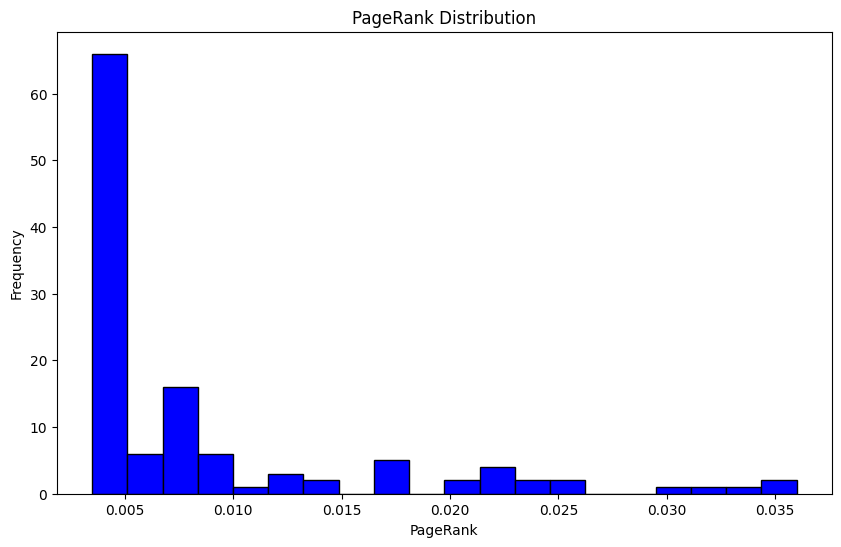

In [ ]:
pagerank = nx.pagerank(G, alpha=0.85, tol=0.001)

#PageRank for each node
print("PageRank:")
for node, rank in sorted(pagerank.items(), key=lambda item: item[1], reverse=True):
    print(f"Node {node}: {rank}")

#distribution of PageRank values
plt.figure(figsize=(10, 6))
plt.hist(list(pagerank.values()), bins=20, color='b', edgecolor='black')
plt.title('PageRank Distribution')
plt.xlabel('PageRank')
plt.ylabel('Frequency')
plt.show()